# Week 2 Assignment
Create a graph class and use it to create a social network graph. Then, look at the FEC data, do some spelunking, and build a graph of connections you find in the FEC data.

## Graph Class

In [ ]:
class Vertex():
    '''Create a vertex for a directed graph.
    
    This class allows you to insert vertices in a directed graph fashion. Each
    vertex in the graph has children and parents. These children and parents
    are tracked internally. A "child" is defined as a vertex with an edge 
    directed TOWARDS it from the current vertex. A "parent" vertex is the vertex
    with an edge that is directed towards the current vertex.

    Attributes
    ----------
    value : None, str
        The value of the graph vertex.

    edge_desc : str, default='friends'
        What description to give to the directed edges

    child_edges : dict
        Dictionary of child graph vertices. The key is the value of the graph
        vertex and the value is the actual `Graph` object. Alphabetically
        sorted for consistency.

    parent_edges : dict
        Dictionary of parent graph vertices. The key is the value of the graph
        vertex and the value is the actual `Graph` object. Alphabetically
        sorted for consistency.

    is_visited : bool
        Indicates whether this particular graph vertex has been visited yet
        by a traversal.
    '''

    def __init__(self, value=None, edge_desc='friends', *args, **kwargs):
        '''Create a new vertex for the graph.
        
        Parameters
        ----------
        value : None, str
            The value to assign the graph vertex.
        '''
        self.value = value
        self.child_edges = {}
        self.parent_edges = {}
        self.edge_desc = edge_desc
        self.is_visited = False

    def __str__(self):
        return (
            f'Graph Vertex: Value = {self.value}; '
            f'# Children ({self.edge_desc} with/to) = {len(self.child_edges)}; '
            f'# Parents ({self.edge_desc} of/from) = {len(self.parent_edges)}'
        )

    def insert(self, vertex, mode='child'):
        '''Insert a child or parent vertex for this graph vertex.

        This will insert a child or parent vertex if it currently does not
        exist as a child or parent of this vertex.

        Parameters
        ----------
        vertex : Graph object
            The Graph vertex to attach to this vertex.

        mode : str, default='child'
            If this parameter is set to 'child', this will insert a child
            vertex. If set to 'parent', it will insert a parent vertex.
        '''
        if self.value is None:
                self.value = value
        else:
            if mode == 'child':
                if vertex.value not in self.child_edges.keys():
                    self.child_edges[vertex.value] = vertex
                    vertex.parent_edges[self.value] = self
            elif mode == 'parent':
                if vertex.value not in self.parent_edges.keys():
                    vertex.child_edges[self.value] = self
                    self.parent_edges[vertex.value] = vertex
            else:
                raise ValueError(
                    f'"{mode}" is an invalid mode! Please choose either "child" or "parent"!'
                )

        # Sort dictionary by keys; could have used OrderedDict as well
        self.child_edges = dict(sorted(self.child_edges.items()))
        self.parent_edges = dict(sorted(self.parent_edges.items()))

### Graph Class Testing
I create a complex web of connections to ensure that the class is working properly and updating child/parent connections correctly.

In [ ]:
# Create a fake friendship network from Harry Potter
harry_potter = Vertex('Harry Potter')
ron_weasley = Vertex('Ron Weasley')
hermoine_granger = Vertex('Hermoine Granger')
rubius_hagrid = Vertex('Rubius Hagrid')
ginny_weasley = Vertex('Ginny Weasley')
fred_weasley = Vertex('Fred Weasley')
george_weasley = Vertex('George Weasley')
albus_dumbledore = Vertex('Albus Dumbledore')
sirius_black = Vertex('Sirius Black')
severus_snape = Vertex('Severus Snape')
remus_lupin = Vertex('Remus Lupin')
neville_longbottom = Vertex('Neville Longbottom')

#########################
# Two-Sided Friendships #
#########################
# Setting the `mode` to 'child' means Harry considers himself friends with 
# Hagrid and setting the `mode` to 'parent' means Hagrid considers himself 
# friends with Harry. That means you can have one-sided "friendships" where
# one person considers him/herself friends with someone else, but that other
# person may not consider the other person a friend.
harry_potter.insert(rubius_hagrid, mode = 'child') 
harry_potter.insert(rubius_hagrid, mode = 'parent')

# This is another way to create the two-way friendship by using the `insert`
# function of each respective Vertex object. Either this way or the above way
# works so there are no duplicate objects and children/parents are updated
# properly when viewing a specific Vertex.
harry_potter.insert(ron_weasley) 
ron_weasley.insert(harry_potter) 

harry_potter.insert(hermoine_granger)
hermoine_granger.insert(harry_potter)

ron_weasley.insert(hermoine_granger)
hermoine_granger.insert(ron_weasley)

fred_weasley.insert(george_weasley)
george_weasley.insert(fred_weasley)

rubius_hagrid.insert(albus_dumbledore)
albus_dumbledore.insert(rubius_hagrid)

albus_dumbledore.insert(severus_snape)
severus_snape.insert(albus_dumbledore)

harry_potter.insert(sirius_black)
sirius_black.insert(harry_potter)

sirius_black.insert(remus_lupin)
remus_lupin.insert(sirius_black)

ron_weasley.insert(ginny_weasley)
ginny_weasley.insert(ron_weasley)

harry_potter.insert(ginny_weasley)
ginny_weasley.insert(harry_potter)

#########################
# One-Sided Friendships #
#########################
harry_potter.insert(fred_weasley)
harry_potter.insert(george_weasley)
neville_longbottom.insert(harry_potter)
neville_longbottom.insert(ron_weasley)
neville_longbottom.insert(hermoine_granger)
severus_snape.insert(harry_potter)

################
# Test Results #
################
# Harry Potter should have 7 children and 7 parents
print(harry_potter)

# Ron Weasley should have 3 children and 4 parents
print(ron_weasley)

# Hermoine Granger should have 2 children and 3 parents
print(hermoine_granger)

# Rubius Hagrid should have 2 children and 2 parents
print(rubius_hagrid)

# Ginny Weasley should have 2 children and 2 parents
print(ginny_weasley)

# Fred Weasley should have 1 child and 2 parents
print(fred_weasley)

# George Weasley should have 1 child and 2 parents
print(george_weasley)

# Albus Dumbledore should have 2 children and 2 parents
print(albus_dumbledore) 

# Sirius Black should have 2 children and 2 parents
print(sirius_black) 

# Severus Snape should have 2 children and 1 parent
print(severus_snape) 

# Remus Lupin should have 1 child and 1 parent
print(remus_lupin) 

# Neville Longbottom should have 3 children and 0 parents
print(neville_longbottom)

Graph Vertex: Value = Harry Potter; # Children (friends with/to) = 7; # Parents (friends of/from) = 7
Graph Vertex: Value = Ron Weasley; # Children (friends with/to) = 3; # Parents (friends of/from) = 4
Graph Vertex: Value = Hermoine Granger; # Children (friends with/to) = 2; # Parents (friends of/from) = 3
Graph Vertex: Value = Rubius Hagrid; # Children (friends with/to) = 2; # Parents (friends of/from) = 2
Graph Vertex: Value = Ginny Weasley; # Children (friends with/to) = 2; # Parents (friends of/from) = 2
Graph Vertex: Value = Fred Weasley; # Children (friends with/to) = 1; # Parents (friends of/from) = 2
Graph Vertex: Value = George Weasley; # Children (friends with/to) = 1; # Parents (friends of/from) = 2
Graph Vertex: Value = Albus Dumbledore; # Children (friends with/to) = 2; # Parents (friends of/from) = 2
Graph Vertex: Value = Sirius Black; # Children (friends with/to) = 2; # Parents (friends of/from) = 2
Graph Vertex: Value = Severus Snape; # Children (friends with/to) = 2; 

## Graph Traversals

In [ ]:
def dfs_traversal(vertex, value=None):
    '''Perform a depth-first search or traversal.

    This will either do a depth-first traversal of a graph or it will perform a 
    depth-first search of the graph depending on if the `value` parameter is 
    None or not.

    Parameters
    ----------
    vertex : Vertex object
        Vertex to start traversal/search at

    value : None, str
        If None, this function will do a depth-first traversal and print
        each vertex value as it goes through it. If a string, this function
        will do a depth-first search and return as soon as it finds the value.
    '''
    vertex_stack = []
    vertex_stack.append(vertex)
    vertex.is_visited = True
    is_search = value is not None

    # Use a list as a "stack" to keep track of all the vertices that we
    # have yet to visit. Each vertex internally keeps track of whether
    # it has been visited or not to stop us from duplicating node visits.
    # Visit each vertex, add its children to the stack, and pop the 
    # just-visited vertex from the stack so we move to the next connected
    # vertex.
    while len(vertex_stack) != 0:
        curr_vertex = vertex_stack.pop() # Gets last added element (LIFO)
        curr_children = list(curr_vertex.child_edges.values())
        print(f'Current Vertex: {curr_vertex.value}')
        if curr_vertex.value != value:
            for idx in range(len(curr_children)):
                child_vertex = curr_children[idx]
                if not child_vertex.is_visited:
                    child_vertex.is_visited = True
                    vertex_stack.append(child_vertex)
        else:
            if is_search:
                print(f'{value} has been found!')
                return
    else:
        if is_search:
            print(f'{value} has not been found...')
            return

def bfs_traversal(vertex, value=None):
    '''Perform a breadth-first search or traversal.

    This will either do a breadth-first traversal of a graph or it will perform 
    a breadth-first search of the graph depending on if the `value` parameter is 
    None or not.

    Parameters
    ----------
    vertex : Vertex object
        Vertex to start traversal/search at
        
    value : None, str
        If None, this function will do a breadth-first traversal and print
        each vertex value as it goes through it. If a string, this function
        will do a breadth-first search and return as soon as it finds the value.
    '''
    vertex_queue = []
    vertex_queue.append(vertex)
    vertex.is_visited = True
    is_search = value is not None

    # Use a list as a "queue" to keep track of all the vertices that we
    # have yet to visit. Each vertex internally keeps track of whether
    # it has been visited or not to stop us from duplicating node visits.
    # Visit each vertex, add its children to the queue, and pop the 
    # just-visited vertex from the queue so we move to the next connected
    # vertex.
    while len(vertex_queue) != 0:
        curr_vertex = vertex_queue.pop(0) # Gets elements in order (FIFO)
        curr_children = list(curr_vertex.child_edges.values())
        print(f'Current Vertex: {curr_vertex.value}')
        if curr_vertex.value != value:
            for idx in range(len(curr_children)):
                child_vertex = curr_children[idx]
                if not child_vertex.is_visited:
                    child_vertex.is_visited = True
                    vertex_queue.append(child_vertex)
        else:
            if is_search:
                print(f'{value} has been found!')
                return
    else:
        if is_search:
            print(f'{value} has not been found...')
            return

### Graph Traversal Testing
I create a simpler social network to ensure that DFS and BFS are working. I need to recreate the social network before re-running each function since the internal class attribute (`is_visited`) needs to be reset. The function also returns a random vertex to start a search/traversal from. The test social network graph that I generate is shown below.

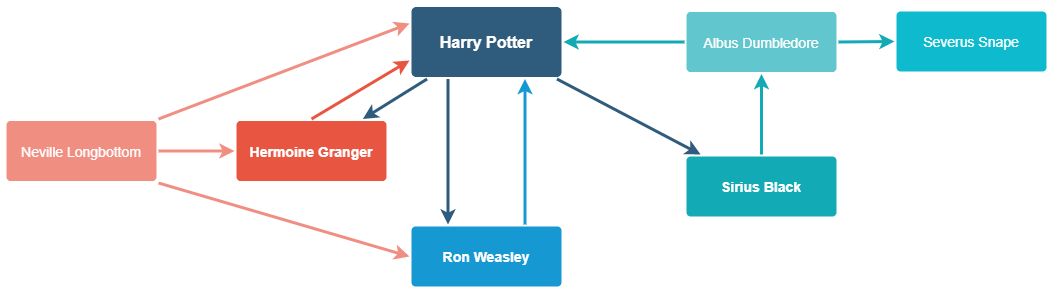

In [ ]:
import random

def create_test_network():
    '''Create a test network and retrieve a random start vertex.'''
    harry_potter = Vertex('Harry Potter')
    ron_weasley = Vertex('Ron Weasley')
    hermoine_granger = Vertex('Hermoine Granger')
    albus_dumbledore = Vertex('Albus Dumbledore')
    sirius_black = Vertex('Sirius Black')
    neville_longbottom = Vertex('Neville Longbottom')
    severus_snape = Vertex('Severus Snape')

    # Harry Potter is friends with...
    harry_potter.insert(hermoine_granger)
    harry_potter.insert(ron_weasley)
    harry_potter.insert(sirius_black)

    # Ron Weasley is friends with...
    ron_weasley.insert(hermoine_granger)
    ron_weasley.insert(harry_potter)

    # Hermoine Granger is friends with...
    hermoine_granger.insert(ron_weasley)
    hermoine_granger.insert(harry_potter)

    # Albus Dumbledoor is friends with...
    albus_dumbledore.insert(harry_potter)
    albus_dumbledore.insert(severus_snape)

    # Sirius Black is friends with...
    sirius_black.insert(albus_dumbledore)

    # Neville Longbottom is friends with...
    neville_longbottom.insert(harry_potter)
    neville_longbottom.insert(hermoine_granger)
    neville_longbottom.insert(ron_weasley)

    vertex_list = [
        harry_potter, ron_weasley, hermoine_granger, 
        albus_dumbledore, sirius_black, neville_longbottom,
        severus_snape
    ]

    # Randomly select a graph vertex to start testing with
    rand_idx = random.randint(0, len(vertex_list) - 1)

    return vertex_list[rand_idx]

#### Depth-First Search & Traversal Test

In [ ]:
##############################
# Expected Traversal Results #
##############################
# Albus Dumbledore -> Severus Snape -> Harry Potter -> Sirius Black -> Ron Weasley -> Hermoine Granger
# Harry Potter -> Sirius Black -> Albus Dumbledore -> Severus Snape -> Ron Weasley -> Hermoine Granger 
# Hermoine Granger -> Ron Weasley -> Harry Potter -> Sirius Black -> Albus Dumbledore -> Severus Snape
# Neville Longbottom -> Ron Weasley -> Hermoine Granger -> Harry Potter -> Sirius Black -> Albus Dumbledore -> Severus Snape
# Ron Weasley -> Hermoine Granger -> Harry Potter -> Sirius Black -> Albus Dumbledore
# Severus Snape -> NO ONE
# Sirius Black -> Albus Dumbledore -> Severus Snape -> Harry Potter -> Ron Weasley -> Hermoine Granger
random_vertex = create_test_network()
dfs_traversal(random_vertex)

Current Vertex: Neville Longbottom
Current Vertex: Ron Weasley
Current Vertex: Hermoine Granger
Current Vertex: Harry Potter
Current Vertex: Sirius Black
Current Vertex: Albus Dumbledore
Current Vertex: Severus Snape


In [ ]:
###########################
# Expected Search Results #
###########################
# Albus Dumbledore -> Severus Snape -> Harry Potter
# Harry Potter -> DONE
# Hermoine Granger -> Ron Weasley -> Harry Potter
# Neville Longbottom -> Ron Weasley -> Hermoine Granger -> Harry Potter
# Ron Weasley -> Hermoine Granger -> Harry Potter
# Severus Snape -> NOT FOUND
# Sirius Black -> Albus Dumbledore -> Severus Snape -> Harry Potter
random_vertex = create_test_network()
dfs_traversal(random_vertex, 'Harry Potter')

Current Vertex: Albus Dumbledore
Current Vertex: Severus Snape
Current Vertex: Harry Potter
Harry Potter has been found!


#### Breadth-First Search & Traversal Test

In [ ]:
##############################
# Expected Traversal Results #
##############################
# Albus Dumbledore -> Harry Potter -> Severus Snape -> Hermoine Granger -> Ron Weasley -> Sirius Black
# Harry Potter -> Hermoine Granger -> Ron Weasley -> Sirius Black -> Albus Dumbledore -> Severus Snape
# Hermoine Granger -> Harry Potter -> Ron Weasley -> Sirius Black -> Albus Dumbledore -> Severus Snape
# Neville Longbottom -> Harry Potter -> Hermoine Granger -> Ron Weasley -> Sirius Black -> Albus Dumbledore -> Severus Snape
# Ron Weasley -> Harry Potter -> Hermoine Granger -> Sirius Black -> Albus Dumbledore -> Severus Snape
# Severus Snape -> NO ONE
# Sirius Black -> Albus Dumbledore -> Harry Potter -> Severus Snape -> Hermoine Granger -> Ron Weasley
random_vertex = create_test_network()
bfs_traversal(random_vertex)

Current Vertex: Severus Snape


In [ ]:
###########################
# Expected Search Results #
###########################
# Albus Dumbledore -> Harry Potter
# Harry Potter -> DONE
# Hermoine Granger -> Harry Potter
# Neville Longbottom -> Harry Potter
# Ron Weasley -> Harry Potter
# Severus Snape -> NOT FOUND
# Sirius Black -> Albus Dumbledore -> Harry Potter
random_vertex = create_test_network()
bfs_traversal(random_vertex, 'Harry Potter')

Current Vertex: Harry Potter
Harry Potter has been found!


## FEC Data

In [ ]:
from google.colab import drive

# Load in data
drive.mount('/data/', force_remount = True)
data_dir = '/data/My Drive/EMSE 6574/FEC dataset'
!ls "{data_dir}"

Mounted at /data/
ccl20.zip	     cn20.zip		    oppexp20.zip
ccl_header_file.csv  cn_header_file.csv     pas220.zip
cm20.zip	     indiv20.zip	    pas2_header_file.csv
cm_header_file.csv   indiv_header_file.csv


In [ ]:
from zipfile import ZipFile
import pandas as pd

for fec_dataset in ['cn', 'cm', 'indiv', 'pas2']:
    print(f'Loading in {fec_dataset}20.zip...') 
    # Open header files
    header = pd.read_csv(f'{data_dir}/{fec_dataset}_header_file.csv')

    # Open zip file and load in data into DataFrames
    with ZipFile(f'{data_dir}/{fec_dataset}20.zip') as zfile:
        if fec_dataset == 'cn':
            candidates = pd.read_csv(
                zfile.open('cn.txt'), sep = '|', names = header.columns
            )
        elif fec_dataset == 'cm':
            committees = pd.read_csv(
                zfile.open('cm.txt'), sep = '|', names = header.columns
            )
        elif fec_dataset == 'indiv':
            # Only reading in first 10,000,000 rows because kernel dies
            # when trying to read in entire dataset
            individual_contribs = pd.read_csv(
                zfile.open('itcont.txt'), sep = '|', names = header.columns,
                nrows = 10000000
            )
        else:
            pac_contribs = pd.read_csv(
                zfile.open('itpas2.txt'), sep = '|', names = header.columns
            )

Loading in cn20.zip...
Loading in cm20.zip...
Loading in indiv20.zip...


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,10,13,14,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loading in pas220.zip...


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
display(candidates.head())
display(committees.head())
display(individual_contribs.head())
display(pac_contribs.head())

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,H0AK00105,"LAMB, THOMAS",NNE,2020,AK,H,0.0,C,N,C00607515,1861 W LAKE LUCILLE DR,NaN,WASILLA,AK,99654.0
1,H0AK00113,"TUGATUK, RAY SEAN",DEM,2020,AK,H,0.0,C,N,NaN,PO BOX 172,NaN,MANAKOTAK,AK,99628.0
2,H0AK01046,"CATALANO, THOMAS",OTH,2020,AK,H,0.0,NaN,N,NaN,188 WEST NORTHERN LIGHTS BOULEVARD,NaN,ANCHORAGE,AK,99503.0
3,H0AL01055,"CARL, JERRY LEE, JR",REP,2020,AL,H,1.0,O,C,C00697789,PO BOX 852138,NaN,MOBILE,AL,36685.0
4,H0AL01063,"LAMBERT, DOUGLAS WESTLEY III",REP,2020,AL,H,1.0,O,C,C00701557,7194 STILLWATER BLVD,NaN,SPANISH FORT,AL,36527.0


,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000059,HALLMARK CARDS PAC,SARAH MOE,2501 MCGEE,MD #500,KANSAS CITY,MO,64108,U,Q,UNK,M,C,NaN,NaN
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN MR.","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,200017400,B,Q,NaN,M,M,DELAWARE MEDICAL PAC,NaN
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,JERRY SIMS JR,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107,U,N,NaN,Q,L,NaN,NaN
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,JERRY SLAUGHTER,623 SW 10TH AVE,NaN,TOPEKA,KS,666121627,U,Q,UNK,Q,M,KANSAS MEDICAL SOCIETY,NaN
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,"ACHENBACH, GRANT MR.","322 CANAL WALK, CANAL LEVEL",NaN,INDIANAPOLIS,IN,46202,U,Q,NaN,T,M,NaN,NaN


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00432906,T,TER,P2018,201901219143901218,22Y,IND,"LEMUNYON, GLENN",WASHINGTON,DC,20002,NaN,NaN,1182019,-500,NaN,SB20A.55755,1305860,NaN,NaN,4021320191639407453
1,C00432906,T,TER,P2018,201901219143901218,22Y,IND,"LEMUNYON, GLENN",WASHINGTON,DC,20002,NaN,NaN,1182019,500,NaN,SB20A.55756,1305860,NaN,NaN,4021320191639407455
2,C00640870,T,TER,P2018,201901259144002482,15C,CAN,"RICHARDSON, CHARDO",LONGWOOD,FL,327505420,INFORMATION REQUESTED,INFORMATION REQUESTED,1242019,76,H8FL07054,VTQYWHKD8W6,1307204,NaN,CONTRIBUTION FOR DEBT RETIREMENT,4021320191639532337
3,C00638478,T,TER,P2018,201901289144040158,15,IND,"STEVENS, RICHARD",DIAMOND BAR,CA,917653902,NOT EMPLOYED,NOT EMPLOYED,1252019,-50,NaN,3703278,1307800,NaN,CHECK LOST,4021220191639267645
4,C00638478,T,TER,P2018,201901289144040159,15C,CAN,"JANOWICZ, PHILIP",BUENA PARK,CA,906211685,FRIENDS OF PHIL JANOWICZ,CANDIDATE,1282019,59816,H8CA39133,3703293,1307800,NaN,CONVERTING PRIMARY LOAN TO CONTRIBUTION,4021220191639267646


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00567180,T,TER,P2020,201901099143774199,24K,PAC,TED YOHO FOR CONGRESS,GAINESVILLE,FL,32608,NaN,NaN,1082019.0,1880,C00494583,H2FL06109,SB23.4447,1303604,NaN,NaN,4021920191640423011
1,C00104885,A,TER,G2020,201901289144031511,24K,CCM,TEAM GRAHAM INC,COLUMBIA,SC,29202,NaN,NaN,12202018.0,3000,C00458828,H4SC03087,SB23.17757,1307636,NaN,NaN,4022220191643444985
2,C00104885,A,TER,P2022,201901289144031512,24K,CCM,TIM SCOTT FOR SENATE,CHARLESTON,SC,29407,NaN,NaN,12202018.0,1000,C00540302,H0SC01279,SB23.17756,1307636,NaN,NaN,4022220191643444987
3,C00104885,A,TER,P2020,201901289144031511,24K,CCM,FRIENDS OF JIM CLYBURN,COLUMBIA,SC,29211,NaN,NaN,1072019.0,470,C00255562,H2SC02042,SB23.17755,1307636,NaN,NaN,4022220191643444981
4,C00688408,T,TER,G2018,201901319144305867,24E,ORG,JACKSON ADVOCATE,JACKSON,MS,39207,NaN,NaN,12122018.0,1000,S8MS00287,S8MS00287,SE.4233,1310906,NaN,NaN,4022420191643632157


### DataFrame Searching & Spelunking

In [ ]:
# Search for specific person in the individual contributions
individual_contribs[
    individual_contribs['NAME'].str.contains('GATES, WILLIAM')
]

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
105218,C00692921,N,M3,P,201903209145875470,15,IND,"GATES, WILLIAM",ALEXANDRIA,VA,22307,SELF EMPLOYED,PHILANTHROPIST,2272019,5000,NaN,15838348,1320532,NaN,NaN,4032020191645279161
629689,C00033134,N,M6,P,201906209150225691,15,IND,"GATES, WILLIAM",COLORADO SPRINGS,CO,80908,RETIRED,RETIRED,5162019,1000,NaN,SA11AI.17734,1335411,NaN,NaN,4062120191658492812
2597356,C00694455,A,Q3,P2020,202003249215949062,15E,IND,"GATES, WILLIAM",FARMINGTON,NM,8.74022e+08,NOT-EMPLOYED,NOT-EMPLOYED,8282019,25,C00401224,2266010,1391948,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4032720201717914257
2597357,C00694455,A,Q3,P2020,202003249215949063,15E,IND,"GATES, WILLIAM",FARMINGTON,NM,8.74022e+08,NOT-EMPLOYED,NOT-EMPLOYED,9112019,10,C00401224,2307146,1391948,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4032720201717914259
2976838,C00694455,A,YE,P2020,202003249215988910,15E,IND,"GATES, WILLIAM",FARMINGTON,NM,874021744,NOT-EMPLOYED,NOT-EMPLOYED,10112019,10,C00401224,2396997,1391949,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4032620201717754318
2976839,C00694455,A,YE,P2020,202003249215988911,15E,IND,"GATES, WILLIAM",FARMINGTON,NM,874021744,NOT-EMPLOYED,NOT-EMPLOYED,11112019,10,C00401224,2465941,1391949,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4032620201717754320
2976840,C00694455,A,YE,P2020,202003249215988912,15E,IND,"GATES, WILLIAM",FARMINGTON,NM,874021744,NOT-EMPLOYED,NOT-EMPLOYED,11292019,28,C00401224,2505066,1391949,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4032620201717754322
4246651,C00659938,A,YE,P2020,202003239215781526,15E,IND,"GATES, WILLIAM",HUTCHINSON,KS,675011324,GRAPHIC IMPRESSIONS,GRAPHIC ARTIST,10092019,20,C00401224,1066309,1391831,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4032820201718125153
4246652,C00659938,A,YE,P2020,202003239215781527,15E,IND,"GATES, WILLIAM",HUTCHINSON,KS,675011324,GRAPHIC IMPRESSIONS,GRAPHIC ARTIST,10162019,15,C00401224,1098696,1391831,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4032820201718125155
4246653,C00659938,A,YE,P2020,202003239215781528,15E,IND,"GATES, WILLIAM",HUTCHINSON,KS,675011324,GRAPHIC IMPRESSIONS,GRAPHIC ARTIST,10182019,15,C00401224,1106773,1391831,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4032820201718125157


Could the first "Gates, William" found above be Bill Gates? His occupation is listed as "PHILANTHROPIST" so it's possible. Let's see what committee he donated to...

In [ ]:
# Search for the committee "C00692921"
committees[
    committees['CMTE_ID'] == 'C00692921'
]

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
10548,C00692921,ENERGY INNOVATION POLITICAL ACTION COMMITTEE,"WILLIAMS, WADE",5845 RICHMOND HIGHWAY,SUITE 820,ALEXANDRIA,VA,22303,U,N,NaN,M,NaN,NONE,NaN


Based on the information above, it looks like this William Gates donated to the Energy Innovation PAC. There isn't much information found about this PAC online. From the FEC filings (https://www.fec.gov/data/committee/C00692921/?tab=about-committee), they didn't really give a concrete statement about themselves. I can only assume that this PAC deals with forwarding policy about energy (gas, wind, etc.).

Let's see what other individuals have contributed to this PAC...

In [ ]:
# Search for the committee "C00692921"
individual_contribs[
    individual_contribs['CMTE_ID'] == 'C00692921'
]

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
20784,C00692921,N,M2,P,201902209145537587,15,IND,"FAISON, JAY",ALEXANDRIA,VA,22307,CLEARPATH,CEO,1042019,5000,NaN,15722057,1316944,NaN,NaN,4022820191644676463
20785,C00692921,N,M2,P,201902209145537587,15,IND,"FAISON, OLGA",ALEXANDRIA,VA,22307,HOMEMAKER,HOMEMAKER,1042019,5000,NaN,15722058,1316944,NaN,NaN,4022820191644676464
20786,C00692921,N,M2,P,201902209145537587,15,IND,"ROGERS, MATTHEW",ALEXANDRIA,VA,22307,NEST,FOUNDER,1152019,5000,NaN,15753224,1316944,NaN,NaN,4022820191644676465
20804,C00692921,N,M2,P,201902209145537588,15,IND,"MYLAVARAPU, SWATI",ALEXANDRIA,VA,22307,INCITE.ORG,FOUNDER,1152019,5000,NaN,15753225,1316944,NaN,NaN,4022820191644676466
105216,C00692921,N,M3,P,201903209145875470,15,IND,"ARNOLD, JOHN",ALEXANDRIA,VA,22307,LAURA AND JOHN ARNOLD FOUNDATION,CHAIR PERSON,2042019,5000,NaN,15783125,1320532,NaN,NaN,4032020191645279159
105217,C00692921,N,M3,P,201903209145875470,15,IND,"ARNOLD, LAURA",ALEXANDRIA,VA,22307,LAURA AND JOHN ARNOLD FOUNDATION,CHAIR PERSON,2042019,5000,NaN,15783126,1320532,NaN,NaN,4032020191645279160
105218,C00692921,N,M3,P,201903209145875470,15,IND,"GATES, WILLIAM",ALEXANDRIA,VA,22307,SELF EMPLOYED,PHILANTHROPIST,2272019,5000,NaN,15838348,1320532,NaN,NaN,4032020191645279161


Based on the individual contribution list above, it looks like the Energy Innovation PAC is getting the attention of some C-suite level people. For example, Matt Rogers is the founder of Nest and Jay Faison is the CEO of ClearPath. 

Did any PACs contribute to the Energy Innovation PAC?

In [ ]:
# Search for the committee "C00692921"
pac_contribs[
    pac_contribs['CMTE_ID'] == 'C00692921'
]

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
250143,C00692921,N,M4,P2020,202004169219673399,24K,CCM,KAPTUR FOR CONGRESS,TOLEDO,OH,43697,NaN,NaN,3122020.0,-5000,C00154625,H2OH09031,17476878,1401409,NaN,REFUND OF PAC CONTRIBUTION - DETAIL IN REPORT ...,4041720201737273468


That's interesting...it looks like the Energy Innovation PAC got $5,000 refunded by the "Kaptur for Congress" committee.

In [ ]:
# Search for the committee "C00154625"
committees[
    committees['CMTE_ID'] == 'C00154625'
]

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
853,C00154625,KAPTUR FOR CONGRESS,"CORNETT, LYDIA CPA",P.O. BOX 899,NaN,TOLEDO,OH,43697,P,H,DEM,Q,NaN,NONE,H2OH09031


Following this new committee, let's see what PACs have contributed to Kaptur's campaign committee.

In [ ]:
# Search for the committee "C00154625" with
# transaction contributions that aren't negative
# and see how much each unique PAC contributed
# sorted by amount contributed
pac_contribs[
    (pac_contribs['CMTE_ID'] == 'C00154625')
    & (pac_contribs['TRANSACTION_AMT'] >= 0)
].groupby('OTHER_ID').agg({
    'TRANSACTION_AMT': ['sum', 'max']
}).sort_values([('TRANSACTION_AMT', 'sum')], ascending = False)

TRANSACTION_AMT      
                      sum   max
OTHER_ID                       
C00649913            3000  1000
C00652065            3000  1000
C00509968            3000  1000
C00658567            3000  1000
C00646844            3000  1000
...                   ...   ...
C00639146            1000  1000
C00641381            1000  1000
C00648725            1000  1000
C00226522            1000  1000
C00729558            1000  1000

[66 rows x 2 columns]

The top five contributors to Kaptur's committee have IDs of "C00649913", "C00652065", "C00509968", "C00658567", and "C00646844". What are these committees and did Kaptur donate the other way towards these other committees?


In [ ]:
# Search for the committees listed above
committees[
    committees['CMTE_ID'].isin([
        'C00649913', 'C00652065', 'C00509968', 'C00658567', 'C00646844'
    ])
]

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
4394,C00509968,CARTWRIGHT FOR CONGRESS,"GERRITY, DAN",PO BOX 414,NaN,SCRANTON,PA,18501,P,H,DEM,Q,NaN,CARTWRIGHT VICTORY FUND,H2PA17079
7308,C00646844,CINDY AXNE FOR CONGRESS,"FIIHR, JENNIFER",PO BOX 65551,NaN,WEST DES MOINES,IA,50265,P,H,DEM,Q,NaN,CINDY AXNE VICTORY FUND,H8IA03124
7481,C00649913,SPANBERGER FOR CONGRESS,"MELE, STEVEN",PO BOX 3121,NaN,GLEN ALLEN,VA,23058,P,H,DEM,Q,NaN,NADLER VICTORY FUND,H8VA07094
7602,C00652065,DEBBIE FOR CONGRESS,"WOLKOV, BEN",PO BOX 566442,NaN,MIAMI,FL,33256,P,H,DEM,Q,NaN,MUCARSEL-POWELL 2018 VICTORY FUND,H8FL26039
8006,C00658567,SUSAN WILD FOR CONGRESS,"ROSENFELD, LINDA",1636 N CEDAR CREST BLVD,#183,ALLENTOWN,PA,18104,P,H,DEM,Q,NaN,SUSAN WILD VICTORY FUND,H8PA15229


In [ ]:
# Search for the committee "C00154625" with
# transaction contributions that aren't negative
# and are in the committee ID list above
pac_contribs[
    (pac_contribs['OTHER_ID'] == 'C00154625')
    & (pac_contribs['TRANSACTION_AMT'] >= 0)
    & (pac_contribs['CMTE_ID'].isin([
        'C00649913', 'C00652065', 'C00509968', 'C00658567', 'C00646844'
    ]))
]

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID


Looks like her committee did not have any transactions to the other top 5 committee donors.

### Contributions Graph Building
Based on the exploration and connections we found above, let's build a graph using the graph class created above!

In [ ]:
# Create the vertices for the graph first
william_gates = Vertex('William Gates', edge_desc = 'contributions')
energy_inno_pac = Vertex('Energy Innovation PAC', edge_desc = 'contributions')
jay_faison = Vertex('Jay Faison', edge_desc = 'contributions')
olga_faison = Vertex('Olga Faison', edge_desc = 'contributions')
matthew_rogers = Vertex('Matthew Rogers', edge_desc = 'contributions')
swati_mylavarapu = Vertex('Swati Mylavarapu', edge_desc = 'contributions')
john_arnold = Vertex('John Arnold', edge_desc = 'contributions')
laura_arnold = Vertex('Laura Arnold', edge_desc = 'contributions')
kaptur = Vertex('Kaptur for Congress', edge_desc = 'contributions')
cartwright = Vertex('Cartwright for Congress', edge_desc = 'contributions')
cindy = Vertex('Cindy Axne for Congress', edge_desc = 'contributions')
spanberger = Vertex('Spanberger for Congress', edge_desc = 'contributions')
debbie = Vertex('Debbie for Congress', edge_desc = 'contributions')
susan = Vertex('Susan Wild for Congress', edge_desc = 'contributions')

# Make the connections. By inserting another vertex to another,
# that means that the inserted vertex received contributions
# from the parent vertex. e.g., William Gates contributed to
# Energy Innovation PAC so we insert the Enery Innovation PAC
# vertex into the William Gates vertex.
############################
# Individual Contributions #
############################
william_gates.insert(energy_inno_pac)
jay_faison.insert(energy_inno_pac)
olga_faison.insert(energy_inno_pac)
matthew_rogers.insert(energy_inno_pac)
swati_mylavarapu.insert(energy_inno_pac)
john_arnold.insert(energy_inno_pac)
laura_arnold.insert(energy_inno_pac)

#####################
# PAC Contributions #
#####################
energy_inno_pac.insert(kaptur) # We know Energy Innovation PAC donated to Kaptur because it was refunded
kaptur.insert(energy_inno_pac) # Kaptur's refund back to the Energy Innovation PAC
cartwright.insert(kaptur)
cindy.insert(kaptur)
spanberger.insert(kaptur)
debbie.insert(kaptur)
susan.insert(kaptur)

# Check vertices
print(william_gates)
print(jay_faison)
print(olga_faison)
print(matthew_rogers)
print(swati_mylavarapu)
print(john_arnold)
print(laura_arnold)
print(energy_inno_pac)
print(kaptur)
print(cartwright)
print(cindy)
print(spanberger)
print(debbie)
print(susan)

Graph Vertex: Value = William Gates; # Children (contributions with/to) = 1; # Parents (contributions of/from) = 0
Graph Vertex: Value = Jay Faison; # Children (contributions with/to) = 1; # Parents (contributions of/from) = 0
Graph Vertex: Value = Olga Faison; # Children (contributions with/to) = 1; # Parents (contributions of/from) = 0
Graph Vertex: Value = Matthew Rogers; # Children (contributions with/to) = 1; # Parents (contributions of/from) = 0
Graph Vertex: Value = Swati Mylavarapu; # Children (contributions with/to) = 1; # Parents (contributions of/from) = 0
Graph Vertex: Value = John Arnold; # Children (contributions with/to) = 1; # Parents (contributions of/from) = 0
Graph Vertex: Value = Laura Arnold; # Children (contributions with/to) = 1; # Parents (contributions of/from) = 0
Graph Vertex: Value = Energy Innovation PAC; # Children (contributions with/to) = 1; # Parents (contributions of/from) = 8
Graph Vertex: Value = Kaptur for Congress; # Children (contributions with/to